In [17]:
#STUDENT PERFORMANCE PREDICTOR
#PROJECT ON ED-TECH BY MEHAK NAZ
#Objective: Predict final performance index of students

In [18]:
# Step 1: IMPORTING ALL THE ESSENTIAL LIBRARIES

#  Data Manipulation & visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Multicollinearity check (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# TO Save the model
import joblib

In [19]:
#STEP 2 : Loading & manipulate data

# Possible paths
paths_to_try = [
    "Student_Performance_cleaned.csv",
    os.path.join("data", "Student_Performance_cleaned.csv"),
    os.path.join("..", "data", "Student_Performance_cleaned.csv")
]

for path in paths_to_try:
    if os.path.exists(path):
        df = pd.read_csv(path)
        print(f"Loaded CSV from: {path}")
        break
else:
    raise FileNotFoundError("Student_Performance_cleaned.csv not found in expected locations")


#Exploring the data
print(df.head(10))
print(df.info())

#basic statistical details
print(df.describe())

Loaded CSV from: ..\data\Student_Performance_cleaned.csv
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   
5              3               78                         No            9   
6              7               73                        Yes            5   
7              8               45                        Yes            4   
8              5               77                         No            8   
9              4               89                         No            4   

   Sample Question Papers Practiced  Performance Index  
0                                 1   

In [ ]:
# target feature
target = "Performance Index"

# seperate the numerical features and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove(target)  # Remove target from numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(numerical_features)
print(categorical_features)

# One-hot Encoding(To encode the categorical feature)
df_encoded =pd.get_dummies (df , columns = categorical_features, drop_first = True)
encoded_columns = df_encoded.columns.drop(target)
print (df_encoded.filter(like ='Extracurricular Activities'))



['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
['Extracurricular Activities']
      Extracurricular Activities_Yes
0                               True
1                              False
2                               True
3                               True
4                              False
...                              ...
9868                            True
9869                            True
9870                            True
9871                            True
9872                           False

[9873 rows x 1 columns]


In [21]:
#check missing values
print(df_encoded.isnull().sum())
print("-" * 30)


#check for duplicates
print(f"Duplicates found: {df_encoded.duplicated().sum()}")
print("-" * 30)

# Skewness check
for col in numerical_features:
    skewness = df_encoded[col].skew()
    print(f"{col} skewness: {skewness:.2f}")


Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Extracurricular Activities_Yes      0
dtype: int64
------------------------------
Duplicates found: 0
------------------------------
Hours Studied skewness: -0.00
Previous Scores skewness: 0.01
Sleep Hours skewness: -0.04
Sample Question Papers Practiced skewness: -0.03


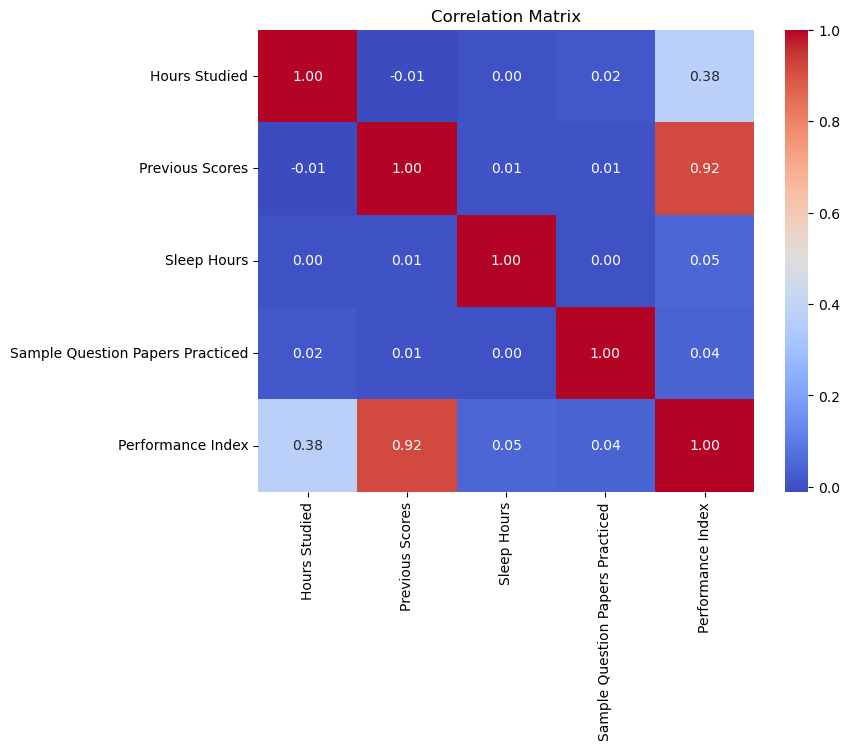

Feature correlation with target:
 Performance Index                   1.000000
Previous Scores                     0.915135
Hours Studied                       0.375332
Sleep Hours                         0.050352
Sample Question Papers Practiced    0.043436
Extracurricular Activities_Yes      0.026075
Name: Performance Index, dtype: float64
                            Feature       VIF
1                   Previous Scores  9.893760
2                       Sleep Hours  9.749961
0                     Hours Studied  4.250268
3  Sample Question Papers Practiced  3.340544


In [44]:
# STEP 5(i) : correlation matrix

#calculating correlation matrix
correlation_matrix = df_encoded.corr(numeric_only= True)

#correlation heatmap
plt.figure(figsize=(8, 6))
#creating heatmap using seaborn
corr = df_encoded[numerical_features + [target]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Feature correlation with target
corr_with_target = df_encoded.corr(numeric_only=True)[target].sort_values(ascending=False)
print("Feature correlation with target:\n", corr_with_target)


# Multicollinearity check (VIF)
X_vif = df_encoded[numerical_features] 
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

In [23]:
# STEP 5(ii) Spliting data into train and test
X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )


# Scale ONLY training data 
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

Linear Regression 
R2 Score: 0.9884301209927054
Mean Squared Error: 4.3059009385384766
Mean Absolute Error: 1.646970398425557


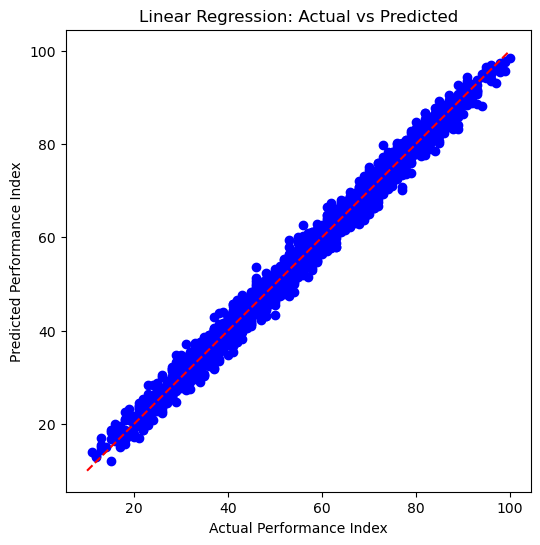

In [24]:

# STEP 6: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Linear Regression
print("Linear Regression ")
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)

#printing results
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("Mean Squared Error:", lr_mse )
print("Mean Absolute Error:", lr_mae)

# Plot Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()



In [25]:
#  LINEAR REGRESSION COEFFICIENTS 

coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr_model.coef_
})

coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

print("Linear Regression Coefficients:\n")
print(coef_df)

print("\nIntercept:", lr_model.intercept_)

Linear Regression Coefficients:

                            Feature  Coefficient
1                   Previous Scores    17.619931
0                     Hours Studied     7.373316
2                       Sleep Hours     0.802138
4    Extracurricular Activities_Yes     0.573823
3  Sample Question Papers Practiced     0.540053

Intercept: 54.810805881535416


Random Forest Model
Mean Squared Error: 5.626628583106064
Mean Absolute Error: 1.8986574369371836
R2 Score: 0.9848813493727009


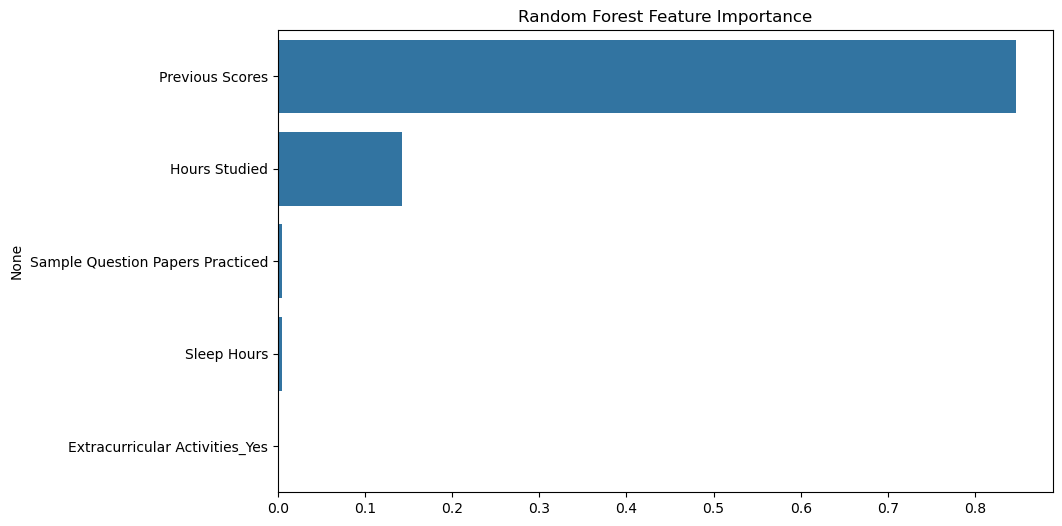

In [26]:
# STEP 7: Random Forest Regressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Model")



rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)


#printing results
print("Mean Squared Error:", rf_mse )
print("Mean Absolute Error:", rf_mae )
print("R2 Score:", r2_score(y_test, y_pred_rf))


# Feature Importance Plot
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Random Forest Feature Importance")
plt.show()

In [27]:
# STEP 8 : Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1, random_state=42)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("\n Gradient Boosting ")
print(f" R2 Score: {gb_r2:.2f} \n Mean Squared Error : {gb_mse:.2f}\nMean Absolute Error : {gb_mae:.2f}")




 Gradient Boosting 
 R2 Score: 0.99 
 Mean Squared Error : 4.58
Mean Absolute Error : 1.70


In [28]:



# STEP 9 : predicting new student data
new_student = pd.DataFrame({
    "Hours Studied": [7],
    "Previous Scores": [100],
    "Sleep Hours": [9],
    "Sample Question Papers Practiced": [5],
    "Extracurricular Activities_Yes": [1],
})
# Scale the new student data for Linear Regression
new_student_scaled = new_student.copy()
new_student_scaled[numerical_features] = scaler.transform(new_student[numerical_features])

# Predict with each model
pred_lr = lr_model.predict(new_student_scaled)[0]
pred_rf = rf_model.predict(new_student)[0]  
pred_gb = gb_model.predict(new_student)[0] 

print(f"Performance Index (LR): {pred_lr:.2f}")
print(f"Performance Index (RF): {pred_rf:.2f}")
print(f"Performance Index (GB): {pred_gb:.2f}")







Performance Index (LR): 93.58
Performance Index (RF): 90.94
Performance Index (GB): 92.59


In [33]:
# TEST: Checking if predictions are in realistic range
print(f"\n SANITY CHECK (Prediction are in realistic range or not):")
print(f"Expected range: 0-100")


# Ensure predictions are in valid range
for name, pred in [("LR", pred_lr), ("RF", pred_rf), ("GB", pred_gb)]:
    if not (0 <= pred <= 100):
        print(f" {name} prediction out of expected range: {pred}")
    else:
        print(f" {name} prediction is reasonable: {pred:.2f}")






 SANITY CHECK (Prediction are in realistic range or not):
Expected range: 0-100
 LR prediction is reasonable: 93.58
 RF prediction is reasonable: 90.94
 GB prediction is reasonable: 92.59



Model Comparison:
                Model       MSE       MAE        R2
0  Linear Regression  4.305901  1.646970  0.988430
1      Random Forest  5.626629  1.898657  0.984881
2  Gradient Boosting  4.575901  1.695763  0.987705


C:\Users\User\AppData\Local\Temp\ipykernel_19868\760931020.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2',data=comparison_df, palette='viridis', dodge=False)


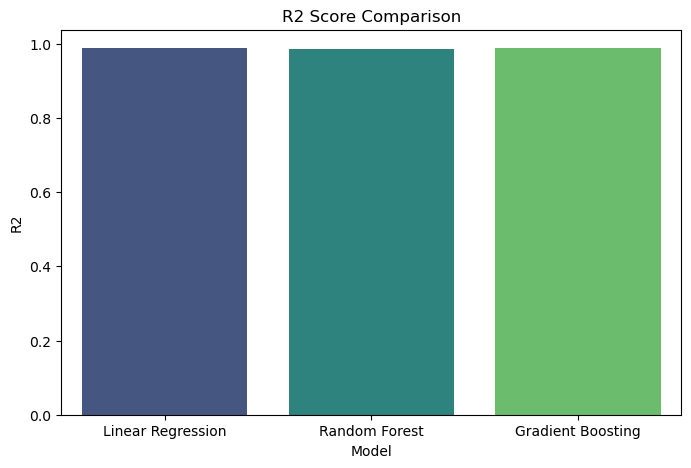

In [ ]:
# STEP 10: MODEL COMPARISON

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MSE': [lr_mse, rf_mse, gb_mse],
    'MAE': [lr_mae, rf_mae, gb_mae],
    'R2':  [lr_r2, rf_r2, gb_r2]
})

print("\nModel Comparison:\n", comparison_df)

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R2',data=comparison_df, palette='viridis', dodge=False) 
plt.title("R2 Score Comparison")
plt.show()




In [43]:
# STEP 11 :Save all models and scaler

joblib.dump(scaler, "../models/scaler.pkl")
joblib.dump(lr_model, "../models/linear_model.pkl")
joblib.dump(rf_model, "../models/random_forest.pkl")
joblib.dump(gb_model, "../models/gradient_boost.pkl") 

print("Models and scaler saved successfully.\n")


print(f'The comparision results: \n{comparison_df}')

print("\n The ML-Pipeline is completed,Linear regression model performed the best")

Models and scaler saved successfully.

The comparision results: 
               Model       MSE       MAE        R2
0  Linear Regression  4.305901  1.646970  0.988430
1      Random Forest  5.626629  1.898657  0.984881
2  Gradient Boosting  4.575901  1.695763  0.987705

 The ML-Pipeline is completed,Linear regression model performed the best
